In [6]:
import numpy as np

# Adam
**Adam (Adaptive Moment Estimation)** là một trong những thuật toán tối ưu hóa phổ biến nhất trong deep learning. Adam kết hợp hai kỹ thuật chính: Momentum (động lượng) và RMSProp (sử dụng trung bình động của bình phương gradient), nhằm cải thiện tốc độ và độ ổn định trong quá trình tối ưu hóa, đặc biệt khi đối mặt với các hàm mất mát phức tạp.

## 1. Ý tưởng cơ bản của Adam
Adam giúp tự động điều chỉnh tốc độ học (learning rate) cho từng tham số của mô hình trong mỗi bước, kết hợp với momentum và adaptive learning rate (tốc độ học điều chỉnh theo thời gian).

Adam sử dụng ba yếu tố chính:

* **Momentum (động lượng)**: Được tính bằng cách sử dụng trung bình động của gradient.
* **RMSProp**: Tính trung bình động của bình phương gradient để điều chỉnh tốc độ học.
* **Bias correction**: Sửa sai độ chệch trong ước tính của momentum và RMSProp trong những bước đầu của quá trình huấn luyện.

## 2. Công thức cập nhật trọng số của Adam
Công thức cập nhật trọng số trong Adam như sau:

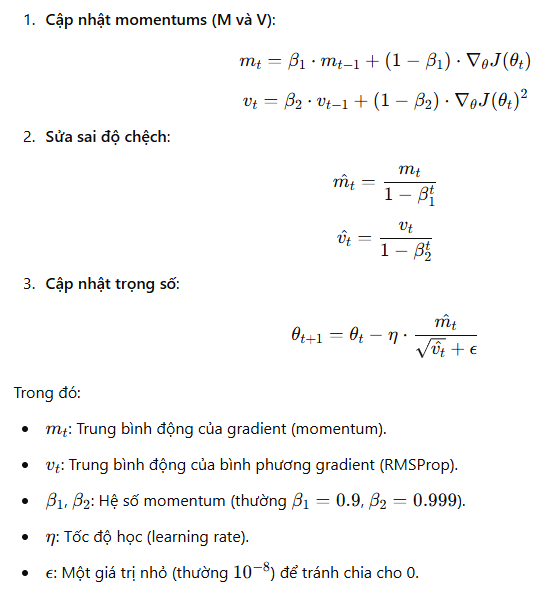

Cho function gồm hai biến như sau:

$f(w_1,w_2) = 0.1w_1^2 + 2w_2^2$

w1 = −5, w2 = −2, initial m1 = 0, m2 = 0, v1 = 0, v2 = 0, α = 0.2, β1 = 0.9,
β2 = 0.999, ε = 10−6

với epoch = 2:


*   Bắt đầu với epoch = 1
*   **STEP1**: Tìm giá trị $dw_1$ và $dw_2$ giá trị đạo hàm của function theo $w_1$ và $w_2$

$dw_1 = 0.1 * 2 * w_1 = 0.1 * 2 * (-5) = -1$

$dw_2 = 2 * 2 * w_2 = 2 * 2 * (-2) = -8$

*   **STEP2**: Tìm giá trị $m_1$ và $m_2$ dựa vào $dw_1$ và $dw_2$ tìm được ở STEP1

$m_1 = 𝛽_1m_{t1-1} + (1 - 𝛽_1) * dw_1 = 0.9 * 0 + (1 - 0.9) * (-1) = -0.1$

$m_2 = 𝛽_1m_{t2-1} + (1 - 𝛽_1) * dw_2 = 0.9 * 0 + (1 - 0.9) * (-8) = -0.8$

*   **STEP3**: Tìm giá trị $v_1$ và $v_2$ dựa vào $dw_1$ và $dw_2$ tìm được ở STEP1

$v_1 = 𝛽_2v_{t1-1} + (1 - 𝛽_2) * dw_1^2 = 0.999 * 0 + (1 - 0.999) * (-1)^2 = 0.001$

$v_2 = 𝛽_2v_{t2-1} + (1 - 𝛽_2) * dw_2^2 = 0.999 * 0 + (1 - 0.999) * (-0.8)^2 = 0.00064$

*   **STEP4**: Thực hiện bias-correction cho V và S để thu được M_coor và V_coor. Sau khi áp dụng bias_correction và ta sẽ thu được m_coor1, m_coor2, v_coor1 và v_coor2

$m\_coor1 = \displaystyle\frac{m_1}{1 - β_1} = \displaystyle\frac{-0.1}{1 - 0.9} = -1$

$m\_coor2 = \displaystyle\frac{m_2}{1 - β_1} = \displaystyle\frac{-0.8}{1 - 0.9} = -8$

$v\_coor1 = \displaystyle\frac{v_1}{1 - β_2} = \displaystyle\frac{0.001}{1 - 0.999} = 1$

$v\_coor2 = \displaystyle\frac{v_2}{1 - β_2} = \displaystyle\frac{0.00064}{1 - 0.999} = 0.64$

*   **STEP4**: Dùng công thức để cập nhật $w_1$ và $w_2$. Hoàn thành epoch = 1

$w_1 = w_1 - α *  \displaystyle\frac{m\_coor1}{ \sqrt{v\_coor1}  + ϵ } = -5 - 0.2 *  \displaystyle\frac{-1}{ \sqrt{1}  + 10^{-6} } = -4.8000001999998$

$w_2 = w_2 - α *  \displaystyle\frac{m\_coor2}{ \sqrt{v\_coor2}  + ϵ } = -2 - 0.2 *  \displaystyle\frac{-8}{ \sqrt{0.64}  + 10^{-6} } = -2.499996875003906e-6$

*   **STEP5**: epoch = 2 ta thực hiện tương tự với STEP1, STEP2, STEP3 và STEP4 như trên với $w_1$ và $w_2$ đã được cập nhật từ epoch = 1


In [7]:
def df_w(W):
  """
  Thực hiện tính gradient của dw1 và dw2
  Arguments:
  W -- np.array [w1, w2]
  Returns:
  dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2

  """
  W = np.array(W)
  dW = np.zeros_like(W)
  dW[0] = 0.1 * 2 * W[0]
  dW[1] = 2 * 2 * W[1]
  return dW


In [9]:
def adam(W, M, V, dW, lr, beta1, beta2):
  eps = 1e-6
  M = beta1 * M + (1 - beta1) * dW
  V = beta2 * V + (1 - beta2) * (dW ** 2)

  M_coor = M / (1 - beta1)
  V_coor = V / (1 - beta2)

  W = W - lr * M_coor / (np.sqrt(V_coor) + eps)
  return W, M, V

In [11]:
def train_pl(optimizer, lr, epochs):
  # Initial point
  W = np.array([-5, -2], dtype=np.float32)
  M = np.zeros_like(W)
  V = np.zeros_like(W)
  beta1 = 0.9
  beta2 = 0.999

  # list of results
  results = [W]

  for epoch in range(epochs):
    dW = df_w(W)
    W, M, V = optimizer(W, M, V, dW, lr, beta1, beta2)
    results.append(W)

  return results

In [14]:
lr = 0.2
train_pl(adam, lr, 30)

[array([-5., -2.], dtype=float32),
 array([-4.8      , -1.8000001], dtype=float32),
 array([-4.5315742, -1.5323403], dtype=float32),
 array([-4.2198143, -1.2239146], dtype=float32),
 array([-3.8788657 , -0.89208746], dtype=float32),
 array([-3.518482  , -0.55167145], dtype=float32),
 array([-3.1461277 , -0.21734622], dtype=float32),
 array([-2.76791   ,  0.09556922], dtype=float32),
 array([-2.3890646 ,  0.37175032], dtype=float32),
 array([-2.0142326,  0.5978375], dtype=float32),
 array([-1.6476206 ,  0.76489675], dtype=float32),
 array([-1.2930874 ,  0.86988103], dtype=float32),
 array([-0.9541801 ,  0.91525567], dtype=float32),
 array([-0.63413054,  0.9073334 ], dtype=float32),
 array([-0.3358236,  0.8544368], dtype=float32),
 array([-0.06174704,  0.76556826], dtype=float32),
 array([0.1860667, 0.6496787], dtype=float32),
 array([0.40609515, 0.51535326], dtype=float32),
 array([0.5973661, 0.3707031], dtype=float32),
 array([0.7594756, 0.223314 ], dtype=float32),
 array([0.89257866, 